In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("ambitionbox_data.csv")

In [6]:
def correct_swapped_locations(row):
    if pd.isna(row['Headquarters']) and isinstance(row['Industry'], str):
        if '+' in row['Industry'] and 'locations' in row['Industry'].lower():
            row['Headquarters'] = row['Industry'].split('+')[0].strip()
            row['Industry'] = 'n/a'
    return row

df_corrected = df.apply(correct_swapped_locations, axis=1)

df_corrected.to_csv("ambitionbox_data_corrected.csv", index=False)

print("Swapped rows corrected and saved to 'ambitionbox_data_corrected.csv'")

Swapped rows corrected and saved to 'ambitionbox_data_corrected.csv'


In [10]:
df = df_corrected

In [12]:
df

,Company,Industry,Headquarters,Reviews,Jobs,Salaries,Benefits,Interviews
0,TCS,IT Services & Consulting,Bangalore / Bengaluru,(95.7k),247,9L,11.9k,10.9k
1,Accenture,IT Services & Consulting,Bangalore / Bengaluru,(61.4k),10.1k,6L,7.4k,8.5k
2,Wipro,IT Services & Consulting,Bangalore / Bengaluru,(56.1k),4k,4.5L,5.3k,5.9k
3,Cognizant,IT Services & Consulting,Hyderabad / Secunderabad,(53.3k),273,5.8L,6.1k,5.8k
4,Capgemini,IT Services & Consulting,Bangalore / Bengaluru,(44.9k),1.4k,4.4L,4.2k,5k
...,...,...,...,...,...,...,...,...
515,Angel One,FinTech,Mumbai,(1.6k),25,6.8k,169,143
516,TVS Sundram Fasteners,Auto Components,Chennai,(1.6k),1,6.4k,217,74
517,Vedantu,EdTech,Bangalore / Bengaluru,(1.6k),3,9.1k,163,187
518,Torrent Power,Power,Ahmedabad,(1.6k),45,6.9k,170,132


In [14]:
def convert_k_values(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip("()")
    if 'k' in val:
        return float(val.replace('k', '')) * 1_000
    elif 'L' in val:
        return float(val.replace('L', '')) * 100_000
    elif 'M' in val:
        return float(val.replace('M', '')) * 1_000_000
    return pd.to_numeric(val, errors='coerce')

columns_to_convert = ['Reviews', 'Jobs', 'Benefits', 'Interviews']
for col in columns_to_convert:
    df[col] = df[col].apply(convert_k_values)

df['Salaries'] = df['Salaries'].apply(convert_k_values)
df['Industry'] = df['Industry'].fillna("Unknown")

In [16]:
df

,Company,Industry,Headquarters,Reviews,Jobs,Salaries,Benefits,Interviews
0,TCS,IT Services & Consulting,Bangalore / Bengaluru,95700.0,247.0,900000.0,11900.0,10900.0
1,Accenture,IT Services & Consulting,Bangalore / Bengaluru,61400.0,10100.0,600000.0,7400.0,8500.0
2,Wipro,IT Services & Consulting,Bangalore / Bengaluru,56100.0,4000.0,450000.0,5300.0,5900.0
3,Cognizant,IT Services & Consulting,Hyderabad / Secunderabad,53300.0,273.0,580000.0,6100.0,5800.0
4,Capgemini,IT Services & Consulting,Bangalore / Bengaluru,44900.0,1400.0,440000.0,4200.0,5000.0
...,...,...,...,...,...,...,...,...
515,Angel One,FinTech,Mumbai,1600.0,25.0,6800.0,169.0,143.0
516,TVS Sundram Fasteners,Auto Components,Chennai,1600.0,1.0,6400.0,217.0,74.0
517,Vedantu,EdTech,Bangalore / Bengaluru,1600.0,3.0,9100.0,163.0,187.0
518,Torrent Power,Power,Ahmedabad,1600.0,45.0,6900.0,170.0,132.0


In [18]:
top_industries = df['Industry'].value_counts().head(5)
top_cities = df['Headquarters'].value_counts().head(5)
top_jobs = df[['Company', 'Jobs']].sort_values(by='Jobs', ascending=False).head(5)
top_reviews = df[['Company', 'Reviews']].sort_values(by='Reviews', ascending=False).head(5)
correlations = df[['Reviews', 'Jobs', 'Salaries', 'Benefits', 'Interviews']].corr()

print("Top Industries:\n", top_industries)
print("\nTop Cities:\n", top_cities)
print("\nTop Companies by Jobs:\n", top_jobs)
print("\nTop Companies by Reviews:\n", top_reviews)
print("\nCorrelation Matrix:\n", correlations)

Top Industries:
 Industry
IT Services & Consulting    71
Insurance                   29
Banking                     26
Pharma                      25
Financial Services          23
Name: count, dtype: int64

Top Cities:
 Headquarters
Bangalore / Bengaluru       110
Mumbai                      104
Pune                         55
Chennai                      44
Hyderabad / Secunderabad     39
Name: count, dtype: int64

Top Companies by Jobs:
           Company     Jobs
1       Accenture  10100.0
2           Wipro   4000.0
34  Ernst & Young   3700.0
14         Amazon   2700.0
62  Bajaj Finance   2100.0

Top Companies by Reviews:
      Company  Reviews
0        TCS  95700.0
1  Accenture  61400.0
2      Wipro  56100.0
3  Cognizant  53300.0
4  Capgemini  44900.0

Average Salary by Industry:
 Industry
IT Services & Consulting    86022.535211
Management Consulting       84550.000000
Banking                     35415.384615
Accounting & Auditing       35300.000000
BPO                         30

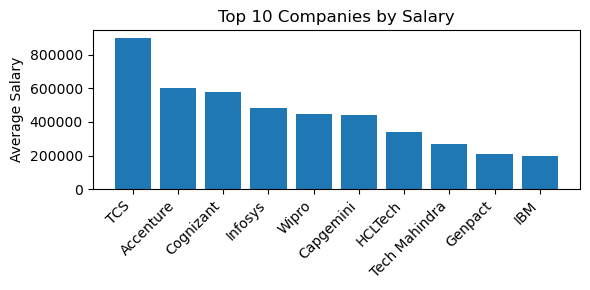

In [99]:
# barchart:
top_salary_companies = df[['Company', 'Salaries']].sort_values(by='Salaries', ascending=False).head(10)
plt.figure(figsize=(6, 3))
plt.bar(top_salary_companies['Company'], top_salary_companies['Salaries'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Salary')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()

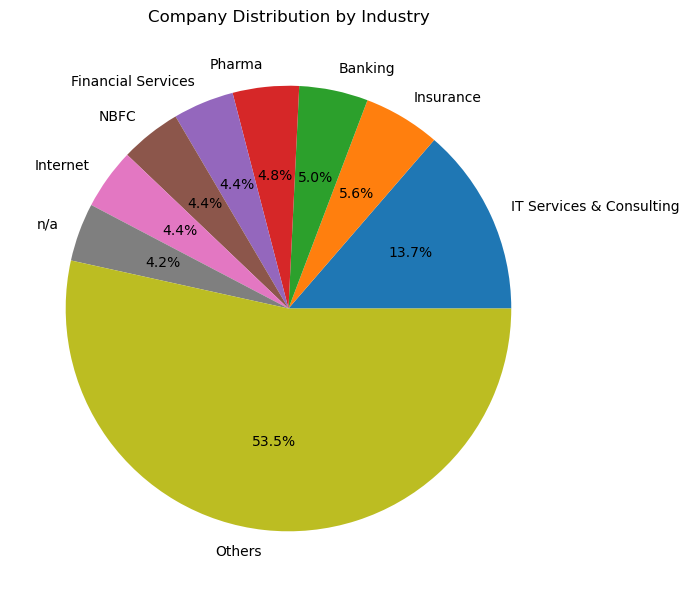

In [22]:
# Pie chart
industry_counts = df['Industry'].value_counts()
top_industries = industry_counts.head(8)
others_sum = industry_counts[8:].sum()
industry_plot = pd.concat([top_industries, pd.Series({'Others': others_sum})])

plt.figure(figsize=(7, 7))
plt.pie(industry_plot, labels=industry_plot.index, autopct='%1.1f%%')
plt.title('Company Distribution by Industry')
plt.tight_layout()
plt.show()

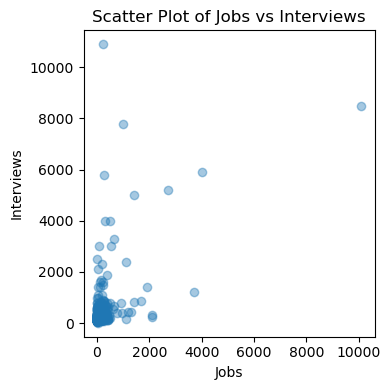

In [24]:
# Scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(df['Jobs'], df['Interviews'], alpha=0.4)
plt.xlabel('Jobs')
plt.ylabel('Interviews')
plt.title('Scatter Plot of Jobs vs Interviews')
plt.tight_layout()
plt.show()

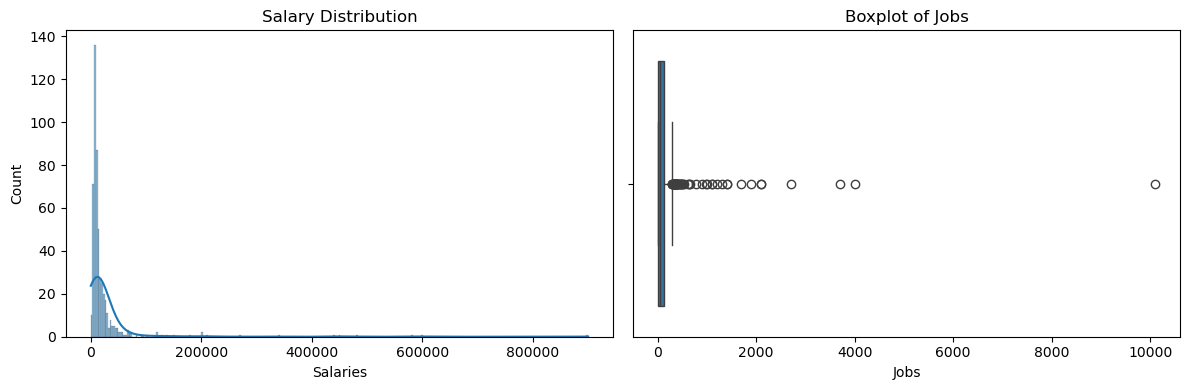

In [26]:
import seaborn as sns

# Distribution and boxplot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Salaries'].dropna(), kde=True)
plt.title('Salary Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Jobs'])
plt.title('Boxplot of Jobs')

plt.tight_layout()
plt.show()

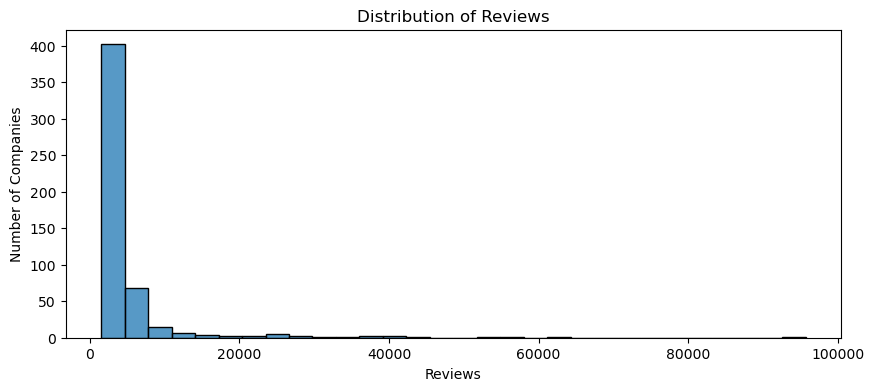

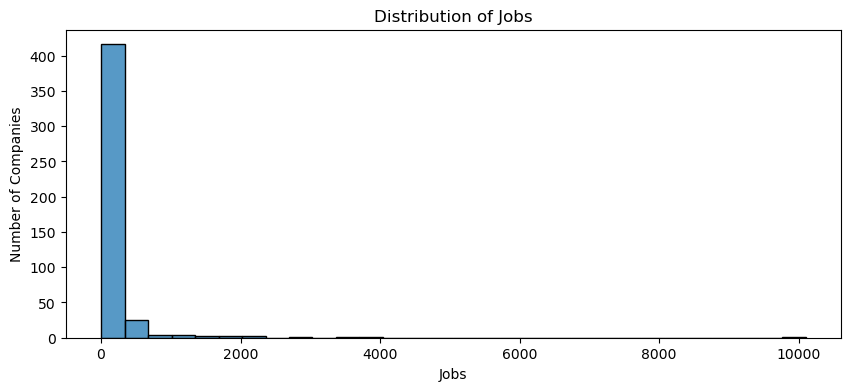

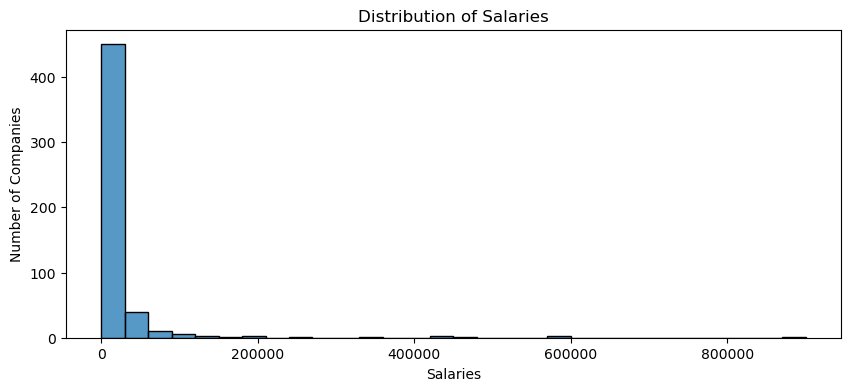

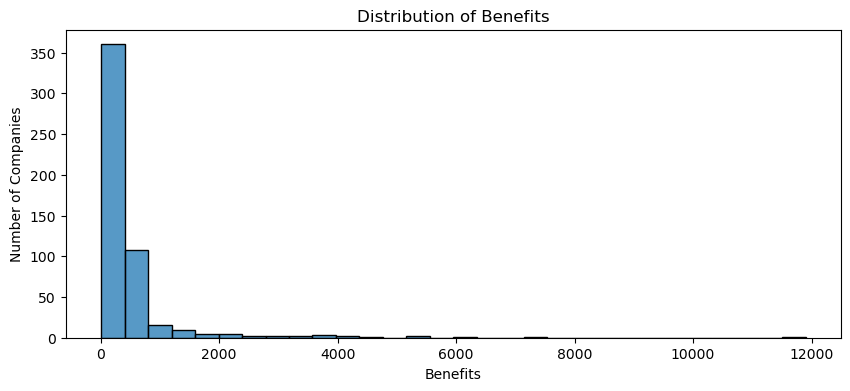

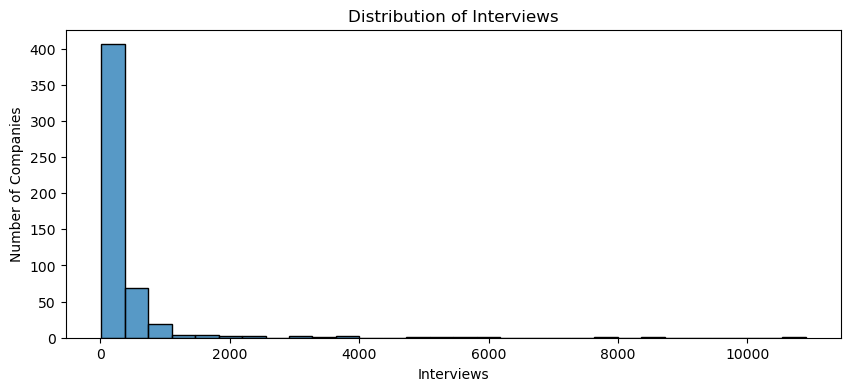

In [28]:
metrics = ['Reviews', 'Jobs', 'Salaries', 'Benefits', 'Interviews']
for col in metrics:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), kde=False, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Companies')
    plt.show()

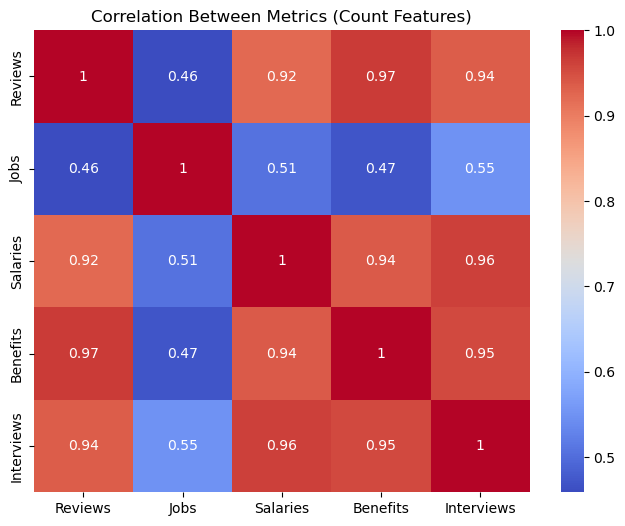

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[metrics].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics (Count Features)")
plt.show()

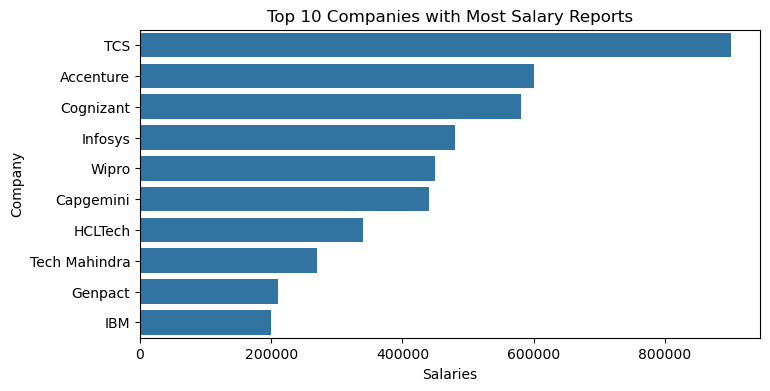

In [32]:
top_salary_data = df[['Company', 'Salaries']].sort_values(by='Salaries', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x='Salaries', y='Company', data=top_salary_data)
plt.title('Top 10 Companies with Most Salary Reports')
plt.show()

Industry
IT Services & Consulting    28519.0
Management Consulting        7260.0
Internet                     5170.0
Insurance                    4591.0
NBFC                         4238.0
Banking                      3985.0
BPO                          2754.0
Software Product             2591.0
Financial Services           1993.0
Industrial Automation        1692.0
Name: Jobs, dtype: float64


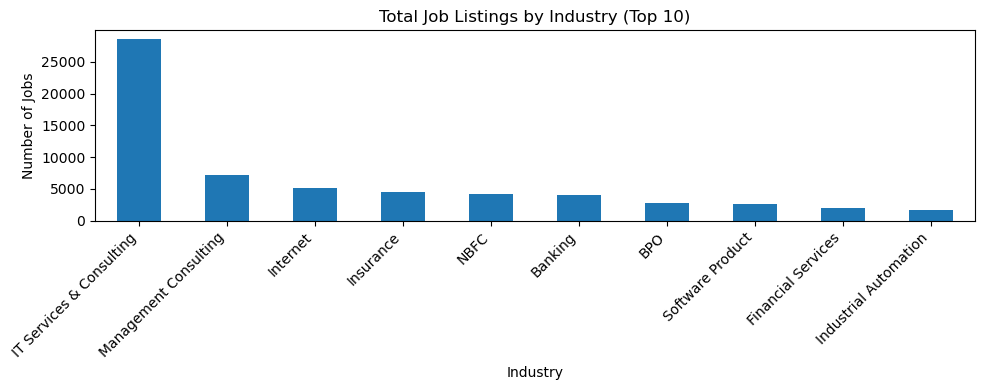

In [59]:
# Group by Industry and sum the Jobs
industry_job_counts = df.groupby('Industry')['Jobs'].sum().sort_values(ascending=False)
print(industry_job_counts.head(10))

# Bar plot
plt.figure(figsize=(10, 4))
industry_job_counts.head(10).plot(kind='bar')
plt.title('Total Job Listings by Industry (Top 10)')
plt.ylabel('Number of Jobs')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                            Company     Jobs
1                         Accenture  10100.0
2                             Wipro   4000.0
34                    Ernst & Young   3700.0
14                           Amazon   2700.0
62                    Bajaj Finance   2100.0
238  Kotak Mahindara Life Insurance   2100.0
38                              PwC   1900.0
85                           Oracle   1700.0
78                       KPMG India   1400.0
4                         Capgemini   1400.0


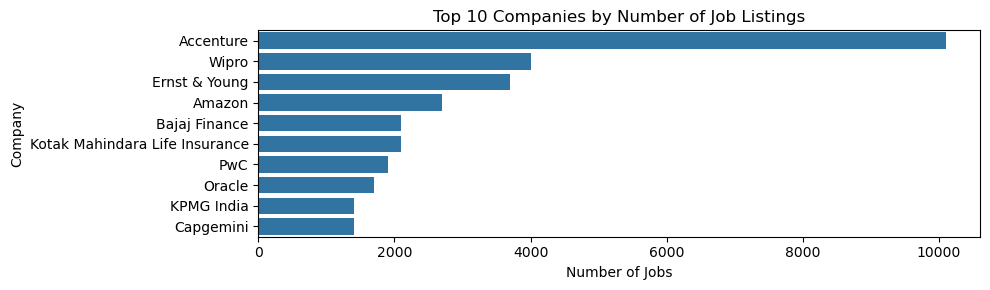

In [69]:
top_companies_by_jobs = df[['Company', 'Jobs']].sort_values(by='Jobs', ascending=False).head(10)
print(top_companies_by_jobs)

plt.figure(figsize=(10, 3))
sns.barplot(x='Jobs', y='Company', data=top_companies_by_jobs)
plt.title('Top 10 Companies by Number of Job Listings')
plt.xlabel('Number of Jobs')
plt.ylabel('Company')
plt.tight_layout()
plt.show()